In [1]:
import pandas as pd

In [2]:
DATASETS_FOLDER = '../../Datasets'

In [3]:
col_names = pd.read_csv(f'{DATASETS_FOLDER}/GSE121861_syngeneic_row_data.csv')
col_names["id"] = col_names["GeneSymbol"]+"_"+col_names["ENSMUSG_ID"]
col_names

,GeneSymbol,ENSMUSG_ID,id
0,Xkr4,ENSMUSG00000051951,Xkr4_ENSMUSG00000051951
1,Gm1992,ENSMUSG00000089699,Gm1992_ENSMUSG00000089699
2,Gm37381,ENSMUSG00000102343,Gm37381_ENSMUSG00000102343
3,Rp1,ENSMUSG00000025900,Rp1_ENSMUSG00000025900
4,Rp1,ENSMUSG00000109048,Rp1_ENSMUSG00000109048
...,...,...,...
27993,AC168977.1,ENSMUSG00000079808,AC168977.1_ENSMUSG00000079808
27994,PISD,ENSMUSG00000095041,PISD_ENSMUSG00000095041
27995,DHRSX,ENSMUSG00000063897,DHRSX_ENSMUSG00000063897
27996,Vmn2r122,ENSMUSG00000096730,Vmn2r122_ENSMUSG00000096730


In [4]:
chunks = pd.read_csv(f'{DATASETS_FOLDER}/GSE121861_syngeneic_expression.csv', names=col_names['id'], chunksize=3000)

In [5]:
first_chunk = next(chunks)

In [ ]:
first_chunk["Genes Expressed Count"] = first_chunk.aggregate(lambda x: x[x > 0].count(), 1)

In [55]:
first_chunk["Genes Not Expressed Count"] = 27998 - first_chunk["Genes Expressed Count"]

In [56]:
first_chunk

,Xkr4_ENSMUSG00000051951,Gm1992_ENSMUSG00000089699,Gm37381_ENSMUSG00000102343,Rp1_ENSMUSG00000025900,Rp1_ENSMUSG00000109048,Sox17_ENSMUSG00000025902,Gm37323_ENSMUSG00000104328,Mrpl15_ENSMUSG00000033845,Lypla1_ENSMUSG00000025903,Gm37988_ENSMUSG00000104217,...,AC125149.4_ENSMUSG00000094799,AC234645.1_ENSMUSG00000095019,AC168977.2_ENSMUSG00000094915,AC168977.1_ENSMUSG00000079808,PISD_ENSMUSG00000095041,DHRSX_ENSMUSG00000063897,Vmn2r122_ENSMUSG00000096730,CAAA01147332.1_ENSMUSG00000095742,Genes Expressed Count,Genes Not Expressed Count
0,0,0,0,0,0,0,0,1.86640,0.00000,0,...,0,0,0,0.00000,0.00000,0,0,0,2942,25056
1,0,0,0,0,0,0,0,0.00000,0.00000,0,...,0,0,0,0.00000,0.00000,0,0,0,3564,24434
2,0,0,0,0,0,0,0,0.72794,0.00000,0,...,0,0,0,0.00000,0.72794,0,0,0,2473,25525
3,0,0,0,0,0,0,0,0.53069,0.53069,0,...,0,0,0,0.00000,0.26534,0,0,0,3938,24060
4,0,0,0,0,0,0,0,0.00000,0.00000,0,...,0,0,0,0.00000,0.00000,0,0,0,2280,25718
5,0,0,0,0,0,0,0,0.39595,0.00000,0,...,0,0,0,0.19797,0.19797,0,0,0,4469,23529
6,0,0,0,0,0,0,0,1.51320,0.75662,0,...,0,0,0,0.00000,0.00000,0,0,0,2350,25648
7,0,0,0,0,0,0,0,0.00000,0.00000,0,...,0,0,0,0.00000,0.00000,0,0,0,2363,25635
8,0,0,0,0,0,0,0,0.77573,0.25858,0,...,0,0,0,0.00000,0.25858,0,0,0,3746,24252
9,0,0,0,0,0,0,0,0.40805,0.00000,0,...,0,0,0,0.40805,0.00000,0,0,0,3212,24786


In [13]:
from umap import UMAP

In [15]:
state = 47

In [19]:
reducer = UMAP(random_state=state)

In [20]:
trans = reducer.fit_transform(first_chunk)

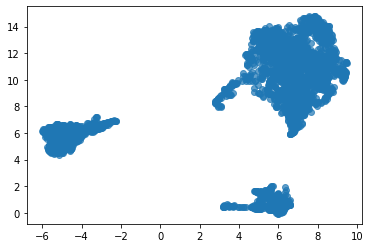

In [22]:
from matplotlib import pyplot as plt
plt.scatter(
    trans[:, 0],
    trans[:, 1],
    alpha=.7
)

In [23]:
from sklearn.cluster import KMeans

In [25]:
clusterer = KMeans(
    n_clusters=3,
    random_state=state
)

In [26]:
clusters = clusterer.fit_transform(trans)

In [31]:
clusters.shape

(3000, 3)

In [34]:
clusterer.labels_.shape

(3000,)

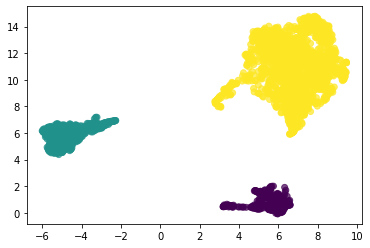

In [35]:
plt.scatter(
    trans[:, 0],
    trans[:, 1],
    alpha=.7,
    c=clusterer.labels_
)